# Lab session 7: Regression and decision tree test 
__Name: Chandhru K<br>
Registration number: 19BCE1449<br>
Course code: CSE4020<br>
Faculty: Dr. Abdul Quadir<br>
Slot: L31 + L32<br>
Date: 27-September-2021 Monday__<br><br>

## ML Algorithms from scratch

In [1]:
import numpy as np
import pandas as pd

In [2]:
import math
import operator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Simple Linear Regression of the form y=mx+c

__Dataset__

In [3]:
X=np.array([i for i in range(0,500,5)])
Y=np.array([2*i+2 for i in X])
noise = np.random.normal(5, 100, Y.shape)
Noisy_Y=Y+noise

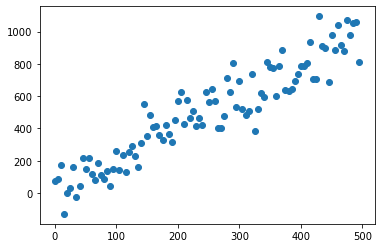

In [4]:
plt.scatter(X,Noisy_Y)
plt.show()

In [5]:
Y=Noisy_Y

The x values were generated by taking values from 0 to 500, and the y values were generated using the linear function y = 2x+2 and noise were added

In [6]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

__Regression coefficients__

In [7]:
m = len(X)
numer = 0
denom = 0
for i in range(m):
  numer += (X[i] - mean_x) * (Y[i] - mean_y)
  denom += (X[i] - mean_x) ** 2
m = numer / denom
c = mean_y - (m * mean_x)

print (f'm = {m} \nc = {c}')

m = 1.9304627935562344 
c = 24.69964735559546


__Visualisation__

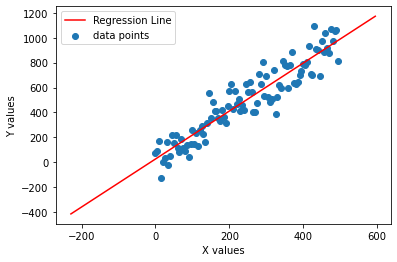

In [8]:
max_x, min_x = np.max(X) + 100,np.min(Y) - 100
x = np.linspace (min_x, max_x, 100)
y = c + m * x
plt.plot(x, y,c="red",label='Regression Line')
plt.scatter(X, Y, label='data points')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

__R squared value__

In [9]:
ss_t = 0
ss_r = 0
for i in range(int(len(X))):
  y_pred = c + m * X[i]
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)
print("R2 Score:")
print(r2)

R2 Score:
0.8784820611690403


<hr>

## Multiple Linear Regression

__Dataset__

In [10]:
#Let's make a sample 3 feature dataset
#Let the relationship be y=w0 + w1x1 + w2x2 + w3x3
x = [[1,1,0],[0,2,0],[1,0,3],[1,4,0]]
y = [3, 6, 9, 12]

Heat Map


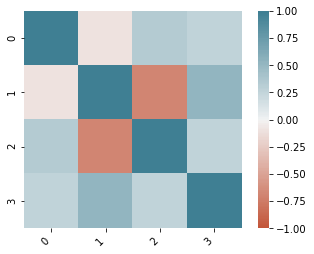

In [11]:
z=[x[i]+[y[i]] for i in range(len(x))]
z=pd.DataFrame(z)
corr = z.corr()
print("Heat Map")
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,horizontalalignment='right');

### Normal Equation method to build the model:

#### Lets build one of the form y=w0 + w1x1 + w2x2 + w3x3

In [12]:
class MultipleLinearRegression:
    def __init__(self):pass
    def __compute(self, x, y):self.__thetas = np.dot(np.dot(np.linalg.inv(np.dot(x.T,x)),x.T),y)
    def fit(self, x, y):self.__compute(np.c_[np.ones(np.array(x).shape[0]),np.array(x)],np.array(y))
    @property
    def coef_(self):return self.__thetas[0]
    @property
    def intercept_(self):return self.__thetas[1:]
    def predict(self, x): return np.dot(np.c_[np.ones(np.array(x).shape[0]),np.array(x)],self.__thetas)      

__Coefficients__

In [13]:
model = MultipleLinearRegression()
model.fit(x,y)
print("Coefficients:")
print(model.coef_,model.intercept_)
print("Predicted values:",model.predict(x))
print("Actual Values:",y)

Coefficients:
-8.881784197001252e-15 [8.8817842e-15 3.0000000e+00 3.0000000e+00]
Predicted values: [ 3.  6.  9. 12.]
Actual Values: [3, 6, 9, 12]


__Mean squared error__

In [14]:
#MSE for this sample
print("Error:\n",np.square(np.subtract(model.predict(x),y)).mean())

Error:
 2.9434372526059003e-29


<hr>

## Decision Tree

__Entropy and information gain functions__

In [15]:
def entropy_finder(df_label):
    val_class,c_count = np.unique(df_label,return_counts = True)
    entropy_value = np.sum([(-c_count[i]/np.sum(c_count))*np.log2(c_count[i]/np.sum(c_count)) for i in range(len(val_class))])
    return entropy_value

In [16]:
def information_gain(dataset,feature,label): 
    dataset_entropy = entropy_finder(dataset[label])   
    values,feat_counts= np.unique(dataset[feature],return_counts=True)
    weighted_feature_entropy = np.sum([(feat_counts[i]/np.sum(feat_counts))*entropy_finder(dataset.where(dataset[feature]==values[i]).dropna()[label]) for i in range(len(values))])    
    feature_info_gain = dataset_entropy - weighted_feature_entropy
    return feature_info_gain

__Dataset__

In [17]:
df = pd.read_csv('heart.csv')
df[160:170]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
161,55,0,1,132,342,0,1,166,0,1.2,2,0,2,1
162,41,1,1,120,157,0,1,182,0,0.0,2,0,2,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


#### Let's slice out a sample on which we perform the Entropy and information gain calculations for root node of the decision tree

In [18]:
df1=df[['age','chol','target']]

In [19]:
df1=df1[160:170]

In [20]:
df1

,age,chol,target
160,56,240,1
161,55,342,1
162,41,157,1
163,38,175,1
164,38,175,1
165,67,286,0
166,67,229,0
167,62,268,0
168,63,254,0
169,53,203,0


In [21]:
features = df1.columns[:-1]
label = 'target'
parent=None
features

Index(['age', 'chol'], dtype='object')

### Making the tree's parent node

In [22]:
def tree(dataset,df,features,label,parent):
    datum= np.unique(df[label],return_counts=True)
    unique_data = np.unique(dataset[label])
    if len(unique_data)<=1:return unique_data[0]
    elif len(dataset)== 0:return unique_data[np.argmax(datum[1])]
    elif len(features)==0:return parent
    else:
        print("Entropy for entire dataset at root node:")
        print(entropy_finder(dataset[label]))
        parent = unique_data[np.argmax(datum[1])]
        item_values = [information_gain(dataset,feature,label) for feature in features]
    print("Information Gain:")
    for i in range(len(features)):
        print("For feature:"+features[i])
        print(item_values[i])
    print("Feature with max Information Gain:--"+features[item_values.index(max(item_values))])
    print("Hence this can be picked at the root node")
    return parent

### Output

In [23]:
decision_tree = tree(df,df,features,label,parent)

Entropy for entire dataset at root node:
0.994264609261905
Information Gain:
For feature:age
0.13530527911049584
For feature:chol
0.5597365268853722
Feature with max Information Gain:--chol
Hence this can be picked at the root node
